In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
# 导入 matplotlib 模块 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文字体为黑体 
plt.rcParams['font.sans-serif'] = ['SimHei'] 
# 设置使负号 '-' 正常显示 
plt.rcParams['axes.unicode_minus'] = False 

In [24]:
x = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
y = np.sin(x) + torch.rand(x.size()) * 0.2

In [25]:
#定义网络所需模块，然后forward规定数据流向，运行时pytorch自动执行前向反向权重更新
class Net(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(Net, self).__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)#沿用原地址，效率更高
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

epoch:   0 loss: 0.98053271
epoch: 100 loss: 0.00801806
epoch: 200 loss: 0.00642970
epoch: 300 loss: 0.00558020
epoch: 400 loss: 0.00519755
epoch: 500 loss: 0.00860521
epoch: 600 loss: 0.00478664
epoch: 700 loss: 0.00455441
epoch: 800 loss: 0.00440160
epoch: 900 loss: 0.00492860
epoch: 1000 loss: 0.00472297
epoch: 1100 loss: 0.00422969
epoch: 1200 loss: 0.00419030
epoch: 1300 loss: 0.00670723
epoch: 1400 loss: 0.00459135
epoch: 1500 loss: 0.00426899
epoch: 1600 loss: 0.00571990
epoch: 1700 loss: 0.00521597
epoch: 1800 loss: 0.00425933
epoch: 1900 loss: 0.00444660
epoch: 1999 loss: 0.0055534313


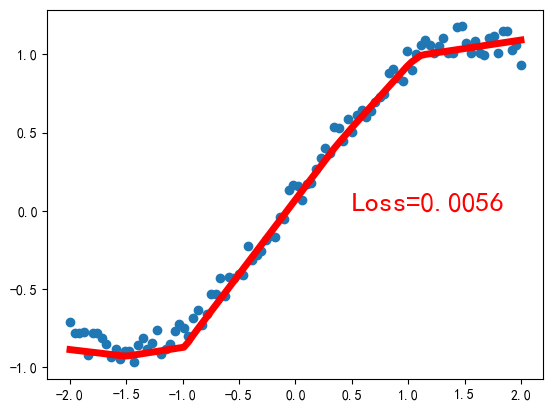

In [26]:
net1 = Net(1, 10, 1)
optimizer = torch.optim.SGD(net1.parameters(), lr=0.2)
loss_func = nn.MSELoss()
for t in range(2000):
    prediction = net1(x)  # result from neural network
    loss = loss_func(prediction, y)
    optimizer.zero_grad()#清空梯度
    loss.backward()#残差反向传播
    optimizer.step()
    if t % 100 == 0:
        print(f'epoch: {t:3} loss: {loss.item():10.8f}')
print(f'epoch: {t:3} loss: {loss.item():10.10f}')
plt.cla()
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)  # color of line = r,width of line = 5
plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
plt.show()
state = {'model': net1.state_dict(), 'optimizer': optimizer.state_dict()}
torch.save(state, 'LinearMdel')